# Ex1

In [78]:
import numpy as np
import scipy

def Francis(A, max_iter, tol):
    k = 1
    V = np.identity(len(A))

    mask = np.ones(A.shape, dtype=bool)
    np.fill_diagonal(mask, 0)
    
    err = abs(max(A[mask].min(), A[mask].max(), key=abs))
    
    while k < max_iter and err > tol:
        Q,R = scipy.linalg.qr(A)
        err = abs(max(A[mask].min(), A[mask].max(), key=abs))
        A = R.dot(Q)
        V = V.dot(Q)
        k += 1

    return A,V,Q,R

[[ 50   0   0   0   0   0   0   0   0   0]
 [  0 -45   0   0   0   0   0   0   0   0]
 [  0   0  45   0   0   0   0   0   0   0]
 [  0   0   0  38   0   0   0   0   0   0]
 [  0   0   0   0 -27   0   0   0   0   0]
 [  0   0   0   0   0 -23   0   0   0   0]
 [  0   0   0   0   0   0  15   0   0   0]
 [  0   0   0   0   0   0   0  13   0   0]
 [  0   0   0   0   0   0   0   0 -10   0]
 [  0   0   0   0   0   0   0   0   0   3]]


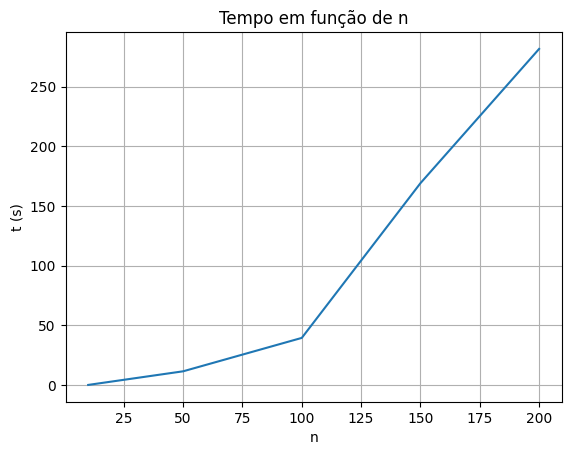

In [91]:
import time
import matplotlib.pyplot as plt

A = np.random.randint(-20,20,size=(10,10))
A = (A + A.T)/2
A,V,Q,R = Francis(A, 10**4, 10**-3)
print(A.astype(int))

tamanhos = []
tempos = []

for n in [10, 50, 100, 150, 200]:
    tamanhos.append(n)
    A = np.random.randint(-20,20,size=(n,n))
    A = (A + A.T)/2
    
    start = time.time()
    A,V,Q,R = Francis(A, 10**4, 10**-3)
    tempos.append(time.time() - start)
    
    #print(tempos)

plt.plot(tamanhos, tempos)
plt.grid()
plt.xlabel('n')
plt.ylabel('t (s)')
plt.title('Tempo em função de n')
plt.show()

# Ex2